In [1]:
from sympy.abc import x,y,z,t
from sympy import solve, exp, log, Matrix, simplify, factor, expand, limit, oo, re, im
from sympy.tensor.array import derive_by_array

In [2]:
f = x**4 -4*x*y +y**4
gradient = derive_by_array(f, [x,y])

In [3]:
g0 = gradient.subs({x:1., y:-1.})
g0

[8.00000000000000, -8.00000000000000]

In [4]:
phi_0 = f.subs({x:1-t*g0[0], y:-1-t*g0[1]})
expand(phi_0)

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6

In [5]:
def mint(f):
    df = derive_by_array(f,t)
    end = limit(f, t, oo)
    start = f.subs({t:0.})
#     print("Start and End")
#     print(start)
#     print(end)
    if end==oo:
        output=0
        target=start
    else:
        end = end.evalf()
        if end > start:
            output=0
            target=start
        else:
            output=oo
            target=end
        
    crits = [a for a in solve(df) if (im(a)==0 and re(a)>=0)]
    for a in crits:
        target_v = f.subs({t:a})
        if target_v < target:
            output = a
            target = target_v
    return output

In [6]:
mint(t-log(t))

1

In [7]:
mint(phi_0)

0.125000000000000

In [8]:
def steepest2(f, x0, y0, steps, verbatim=False):
    output_str  = "\\begin{tabular}{|r|r|r|r|} \\hline \n"
    output_str += " $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\\\ \\hline \\hline \n"
    output_str += "$0$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (x0, y0, f.subs({x:x0, y:y0}))
    gradient = derive_by_array(f, [x,y])
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        g0 = gradient.subs({x:x0, y:y0})
        phi = f.subs({x: x0-t*g0[0], y: y0-t*g0[1]})
        if verbatim: 
            print(expand(phi))
            print(solve(phi))
        t0 = mint(phi)
        xn = x0 - t0*g0[0]
        yn = y0 - t0*g0[1]
        outputx.append(xn)
        outputy.append(yn)
        output_str += "$%d$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (step+1,xn,yn,f.subs({x:xn, y:yn}))
        x0,y0 = xn,yn
    output_str += "\\end{tabular}"
    return outputx, outputy, output_str

In [9]:
ox1,oy1,os = steepest2(f, -1.,1.,2,verbatim=True)
print(os)
ox1=ox1[:2]
oy1=oy1[:2]

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6.0
[0.125000000000000, 0.125 - 0.176776695296637*I, 0.125 + 0.176776695296637*I]
0
[]
\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.000000$ & $1.000000$ & $6.000000$ \\ \hline 
$1$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$2$ & $nan$ & $nan$ & $nan$ \\ \hline 
\end{tabular}


In [10]:
ox2,oy2,os = steepest2(f, 3.5,2.1,16)
print(os)
ox2=ox2[:16]
oy2=oy2[:16]

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $3.500000$ & $2.100000$ & $140.110600$ \\ \hline 
$1$ & $1.044472$ & $1.753064$ & $3.310777$ \\ \hline 
$2$ & $1.141931$ & $1.063276$ & $-1.878163$ \\ \hline 
$3$ & $1.008581$ & $1.044435$ & $-1.988879$ \\ \hline 
$4$ & $1.013966$ & $1.006319$ & $-1.998931$ \\ \hline 
$5$ & $1.000898$ & $1.004472$ & $-1.999891$ \\ \hline 
$6$ & $1.001437$ & $1.000651$ & $-1.999989$ \\ \hline 
$7$ & $1.000093$ & $1.000461$ & $-1.999999$ \\ \hline 
$8$ & $1.000149$ & $1.000067$ & $-2.000000$ \\ \hline 
$9$ & $1.000010$ & $1.000048$ & $-2.000000$ \\ \hline 
$10$ & $1.000015$ & $1.000007$ & $-2.000000$ \\ \hline 
$11$ & $1.000001$ & $1.000005$ & $-2.000000$ \\ \hline 
$12$ & $1.000002$ & $1.000001$ & $-2.000000$ \\ \hline 
$13$ & $1.000000$ & $1.000001$ & $-2.000000$ \\ \hline 
$14$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$15$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$16$ & $1.000000$ & $1.00

In [11]:
ox3,oy3,os = steepest2(f, -13.5,-7.3,20)
print(os)
ox3=ox3[:17]
oy3=oy3[:17]

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-13.500000$ & $-7.300000$ & $35660.686600$ \\ \hline 
$1$ & $2.362722$ & $-4.871733$ & $640.498302$ \\ \hline 
$2$ & $1.434154$ & $1.194162$ & $-0.586492$ \\ \hline 
$3$ & $1.021502$ & $1.130993$ & $-1.896212$ \\ \hline 
$4$ & $1.038817$ & $1.017881$ & $-1.991558$ \\ \hline 
$5$ & $1.002305$ & $1.012291$ & $-1.999167$ \\ \hline 
$6$ & $1.003909$ & $1.001808$ & $-1.999917$ \\ \hline 
$7$ & $1.000236$ & $1.001246$ & $-1.999992$ \\ \hline 
$8$ & $1.000399$ & $1.000185$ & $-1.999999$ \\ \hline 
$9$ & $1.000024$ & $1.000127$ & $-2.000000$ \\ \hline 
$10$ & $1.000041$ & $1.000019$ & $-2.000000$ \\ \hline 
$11$ & $1.000002$ & $1.000013$ & $-2.000000$ \\ \hline 
$12$ & $1.000004$ & $1.000002$ & $-2.000000$ \\ \hline 
$13$ & $1.000000$ & $1.000001$ & $-2.000000$ \\ \hline 
$14$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$15$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$16$ & $1.000000$

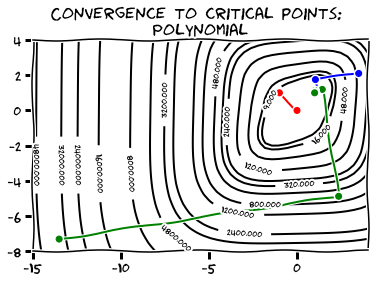

In [12]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd();

xx = np.linspace(-15,4)
yy = np.linspace(-8,4)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, X**4-4*X*Y+Y**4, levels=[9,16,48,120,240,320,480,800,1200,2400,3200,4800,8000,16000,24000,32000,48000], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox1,oy1,'r')
plt.plot(ox1,oy1,'or')
plt.plot(ox2,oy2,'b')
plt.plot(ox2,oy2,'ob')
plt.plot(ox3,oy3,'g')
plt.plot(ox3,oy3,'og')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.title("Convergence to critical points: \nPolynomial")
plt.show()

In [45]:
R = (1-x)**2+(y-x**2)**2
ox,oy,os = steepest2(R, -1.0, -2., 7)
print(os)

xx = np.linspace(-2,2)
yy = np.linspace(-2,3)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'or')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.000000$ & $-2.000000$ & $13.000000$ \\ \hline 
$1$ & $0.378555$ & $-1.483042$ & $3.031194$ \\ \hline 
$2$ & $-0.029793$ & $-0.394111$ & $1.216499$ \\ \hline 
$3$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
$4$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
$5$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
$6$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
$7$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
\end{tabular}


\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $0.000000$ & $0.500000$ & $1.250000$ \\ \hline 
$1$ & $0.629348$ & $0.185326$ & $0.181800$ \\ \hline 
$2$ & $1.000000$ & $0.926629$ & $0.005383$ \\ \hline 
$3$ & $0.974549$ & $0.939354$ & $0.000756$ \\ \hline 
$4$ & $1.000000$ & $0.990256$ & $0.000095$ \\ \hline 
$5$ & $0.996637$ & $0.991937$ & $0.000013$ \\ \hline 
$6$ & $1.000000$ & $0.998663$ & $0.000002$ \\ \hline 
$7$ & $0.999539$ & $0.998893$ & $0.000000$ \\ \hline 
\end{tabular}


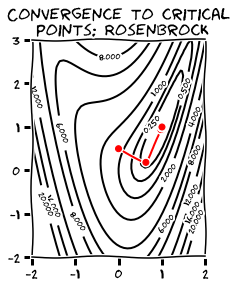

In [49]:
ox,oy,os = steepest2(R, 0., 0.5, 7)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'or')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$1$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$2$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$3$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$4$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$5$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$6$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$7$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
\end{tabular}


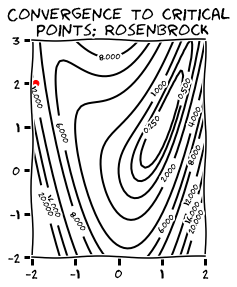

In [56]:
ox,oy,os = steepest2(R, -1.9, 2., 7)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'or')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $0.000000$ & $1.000000$ & $2.000000$ \\ \hline 
$1$ & $0.677651$ & $0.322349$ & $0.122640$ \\ \hline 
$2$ & $0.845112$ & $0.489810$ & $0.074347$ \\ \hline 
$3$ & $0.790731$ & $0.544190$ & $0.050365$ \\ \hline 
$4$ & $0.886871$ & $0.640330$ & $0.034176$ \\ \hline 
$5$ & $0.853294$ & $0.673907$ & $0.024461$ \\ \hline 
$6$ & $0.915350$ & $0.735963$ & $0.017550$ \\ \hline 
$7$ & $0.892770$ & $0.758543$ & $0.012980$ \\ \hline 
\end{tabular}


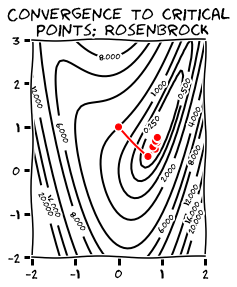

In [57]:
ox,oy,os = steepest2(R, 0., 1., 7)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'or')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()